In [1]:

import cv2
from PIL import Image
from matplotlib import pyplot as plt
from keras.models import load_model
from keras.models import model_from_json
import json
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np 
from PIL import Image
import sys



Using TensorFlow backend.
C:\Users\DELL\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\DELL\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\DELL\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\DELL\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529

In [2]:
with open('model_in_json.json','r') as f:
    model_json = json.load(f)

model = model_from_json(model_json)
model.load_weights('model_weights.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [3]:
from matplotlib.patches import Rectangle

In [4]:
def facechop(image):  
    path=image;
    facedata = "D:/@#MYSTUDYENGI/#VIT_STUFFS/Ty/TY_Sem6/edi_Sem6/haar-cascade-files-master/haar-cascade-files-master/haarcascade_frontalface_default.xml"
    cascade = cv2.CascadeClassifier(facedata)

    img = cv2.imread(image)

    minisize = (img.shape[1],img.shape[0])
    miniframe = cv2.resize(img, minisize)

    faces = cascade.detectMultiScale(miniframe)
    count=0;

    for f in faces:
        x, y, w, h = [ v for v in f ]
        cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0))
        count=count+1;
        sub_face = img[y:y+h, x:x+w]
        
        #cv2.imshow(image, sub_face)
        
        face_file_name = "D:/@#MYSTUDYENGI/#VIT_STUFFS/Ty/TY_Sem6/edi_Sem6/faces/face_" + str(y) + ".jpg"
        
        cv2.imwrite(face_file_name, sub_face)
        gender(face_file_name)
        #plt.imshow(sub_face)
        #plt.show()
        #gender(sub_face);
        #gender(image)

    #cv2.putText(img,prediction,(x,y-40), cv2.FONT_HERSHEY_SIMPLEX, 0.55,(255, 0, 0), 2, cv2.LINE_AA)
    cv2.imshow(image, img)
    plt.imshow(img)
    plt.show()
    
    print('No of faces=',count)
    #print(path)
   # if(count!=0):
    #    gender(path)

    return



In [5]:
def gender(path):
    img = cv2.imread(path)
    

   # img = cv2.imread('your_image.jpg')
    res = cv2.resize(img, dsize=(150, 150), interpolation=cv2.INTER_CUBIC)
    img_pred = image.load_img(path,target_size=(150,150)) 
#give an image to the neural network
    img_pred =image.img_to_array(img_pred) #image conv to numpy array 
    img_pred =np.expand_dims(img_pred, axis=0 )# array given to prediction model
#np.expand_dims(a, axis=1) 

    result=model.predict(img_pred)
    print (result)
    if result[0][0] ==1:
        prediction = "male"
    else:
        prediction = "female"
    #cv2.putText(img,prediction, cv2.FONT_HERSHEY_SIMPLEX, (255, 0, 0), 2, cv2.LINE_AA)
   # return prediction

    print(prediction)
    
    plt.imshow(img)
    plt.show()


[[1.]]
male


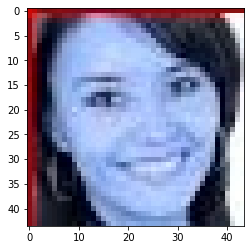

[[0.]]
female


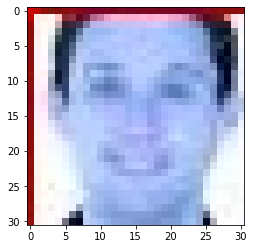

[[1.]]
male


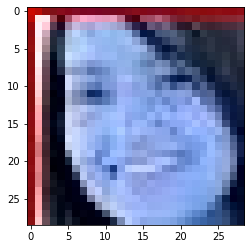

[[0.]]
female


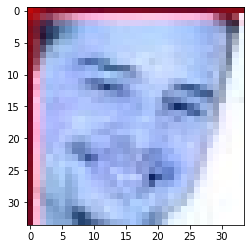

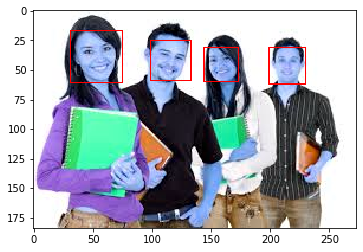

No of faces= 4


In [25]:
if __name__ =='__main__':
    path="D:/@#MYSTUDYENGI/#VIT_STUFFS/Ty/TY_Sem6/edi_Sem6/face12.jpg"
   # path="D:/@#MYSTUDYENGI/#VIT_STUFFS/Ty/TY_Sem6/edi_Sem6/classroom_stud.jpg"
   # path="D:/@#MYSTUDYENGI/#VIT_STUFFS/Ty/TY_Sem6/edi_Sem6/gad/class2.jpg"
    facechop(path)
   # gender(path)

    while(True):
       # key=0; 
        [27, ord('Q'), ord('q')] 
        break
        